# Analiza Lego™ setov zadnjih dvajsetih let
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

sets = pd.read_csv('obdelani-podatki/bricksets-database-1999-2019.csv',index_col='id')
pd.options.display.max_rows = 20

In [2]:
sets

,variant,ime_seta,tema,leto,tip_seta,figurice,st_kock,us_cena,eu_cena,us_ppp,eu_ppp,pakiranje,dostopnost,us_cas_izida,eu_cas_izida
id,,,,,,,,,,,,,,,
1029,1,Milk Delivery Truck,Town,1999,normal,1.0,95.0,NaN,NaN,NaN,NaN,Box,Promotional,NaN,NaN
1054,1,Stena Line Ferry,Promotional,1999,normal,NaN,212.0,NaN,NaN,NaN,NaN,Box,Promotional,NaN,NaN
1061,1,Single Disc Pack,Technic,1999,normal,NaN,NaN,NaN,NaN,NaN,NaN,Polybag,Unknown,NaN,NaN
1068,1,Air Patrol,Town,1999,normal,1.0,20.0,NaN,NaN,NaN,NaN,Box,Retail - limited,NaN,NaN
1069,1,Speedboat,Town,1999,normal,1.0,22.0,NaN,NaN,NaN,NaN,Box,Retail - limited,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ISBN1080207961,1,Building LEGO BrickHeadz Heroes - Volume One: ...,Books,2019,book,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ISBN1081986611,1,Building LEGO BrickHeadz Villains- Volume One:...,Books,2019,book,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ISBN1091708533,1,Expanding the LEGO Winter Village,Books,2019,book,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Povprečne velikosti setov skozi leta

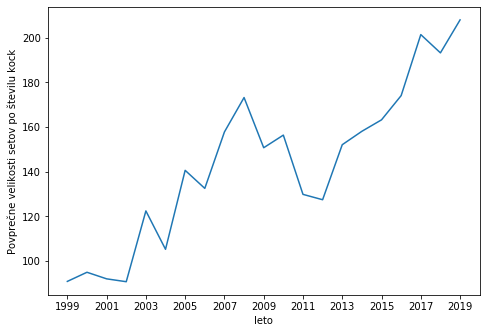

In [110]:
seti_po_letih = sets.groupby('leto')
povpr_velikost_setov = seti_po_letih.st_kock.sum() / seti_po_letih.size()

fig = plt.figure(1)
ax1 = fig.add_subplot(111, position=[0, 0, 1, 1])
ax1.set_ylabel('Povprečne velikosti setov po številu kock')
ax1.set_xlim((1998,2020))
povpr_velikost_setov.plot(x='leto', xticks=[i for i in range(1999,2020,2)])

Text(0, 0.5, 'Število kock')

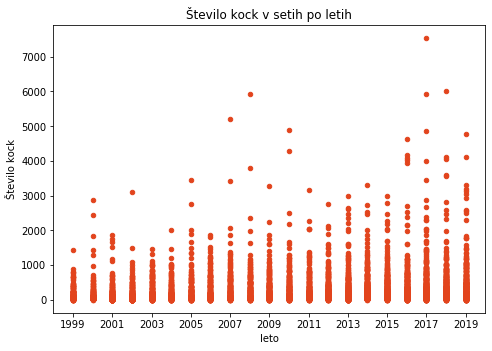

In [130]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111, position=[0, 0, 1, 1])
ax1.set_ylabel('Število kock')
sets.plot.scatter(x='leto', y='st_kock', ax=ax1, xticks=[i for i in range(1999,2020,2)], color=['#E2441D'], title='Število kock v setih po letih',s=20)
plt.ylabel('Število kock')

## Število izdanih setov skozi leta

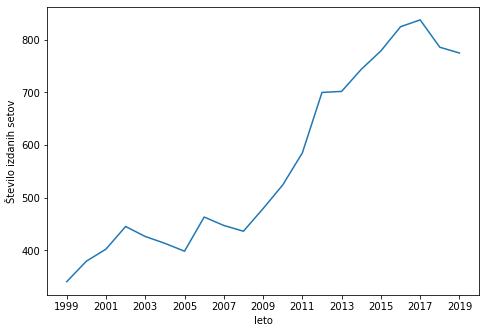

In [4]:
st_izdanih_setov = seti_po_letih.size()

fig = plt.figure(1)
ax1 = fig.add_subplot(111, position=[0, 0, 1, 1])
ax1.set_ylabel('Število izdanih setov')
ax1.set_xlim((1998,2020))
st_izdanih_setov.plot(x='leto', xticks=[i for i in range(1999,2020,2)])

## Najbolj priljubljene teme skozi leta



In [77]:
vse_teme_series = sets.groupby('tema').size()

keys = vse_teme_series.keys()
vse_teme = pd.DataFrame({'st_setov': [vse_teme_series[key] for key in keys]}, index=keys)
vse_teme.sort_values(by='st_setov', ascending=False).head(15)

,st_setov
tema,
Gear,2194
Star Wars,728
Duplo,716
Collectable Minifigures,614
City,614
Promotional,433
Creator,413
Bionicle,389
Friends,360


In [54]:
pd.set_option('display.max_colwidth', None)
teme = sets.groupby('tema')

df_teme = pd.DataFrame(teme[teme['leto'] == '2019'], index=keys)
df_teme
# teme.count(axis='column')
# teme[teme['tema'] == 'Znap']
# df_teme
# df_teme.groupby('leto')
# teme['leto']
# df_teme[df_teme[0] == 'Star Wars']

KeyError: 'Column not found: False'

In [7]:
star_wars = sets[sets['tema'] == 'Star Wars']
star_wars

,variant,ime_seta,tema,leto,tip_seta,figurice,st_kock,us_cena,eu_cena,us_ppp,eu_ppp,pakiranje,dostopnost,us_cas_izida,eu_cas_izida
id,,,,,,,,,,,,,,,
7101,1,Lightsaber Duel,Star Wars,1999,normal,2.0,52.0,6.0,NaN,11.5,11.5,Box,Retail,NaN,NaN
7110,1,Landspeeder,Star Wars,1999,normal,2.0,49.0,6.0,NaN,12.2,12.2,Box,Retail,NaN,NaN
7111,1,Droid Fighter,Star Wars,1999,normal,NaN,62.0,6.0,NaN,9.7,9.7,Box,Retail,NaN,NaN
7121,1,Naboo Swamp,Star Wars,1999,normal,4.0,82.0,10.0,NaN,12.2,12.2,Box,Retail,NaN,NaN
7128,1,Speeder Bikes,Star Wars,1999,normal,3.0,93.0,10.0,NaN,10.8,10.8,Box,Retail,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911950,1,B-Wing,Star Wars,2019,other,NaN,NaN,NaN,NaN,NaN,NaN,Foil pack,Retail - limited,NaN,NaN
911951,1,First Order Stormtrooper,Star Wars,2019,other,1.0,NaN,NaN,NaN,NaN,NaN,Foil pack,Retail - limited,NaN,NaN
911952,1,Jedi Interceptor,Star Wars,2019,other,NaN,NaN,NaN,NaN,NaN,NaN,Foil pack,Retail - limited,NaN,NaN


In [30]:
znap = sets[sets['tema'] == 'Znap']
znap

,variant,ime_seta,tema,leto,tip_seta,figurice,st_kock,us_cena,eu_cena,us_ppp,eu_ppp,pakiranje,dostopnost,us_cas_izida,eu_cas_izida
id,,,,,,,,,,,,,,,
3505,1,Aeroplane,Znap,1999,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3506,1,Motorbike,Znap,1999,normal,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3520,1,Forklift,Znap,1999,normal,NaN,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3521,1,Racer,Znap,1999,normal,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3533,1,{unknown},Znap,1999,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3554,1,Helicopter,Znap,1999,normal,NaN,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3555,1,Jeep,Znap,1999,normal,NaN,262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3582,1,Super Constructor Set,Znap,1999,normal,NaN,258.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
star_wars.groupby('leto').size()
df_sw = pd.DataFrame(star_wars.groupby('leto').size()).rename(columns={0: 'Star Wars'})
df_sw

,Star Wars
leto,
1999,13
2000,19
2001,10
2002,25
2003,20
...,...
2015,64
2016,66
2017,66


In [65]:
znap.groupby('leto').size()
df_z = pd.DataFrame(znap.groupby('leto').size()).rename(columns={0: 'Znap'})
df_z

,Znap
leto,
1999,8


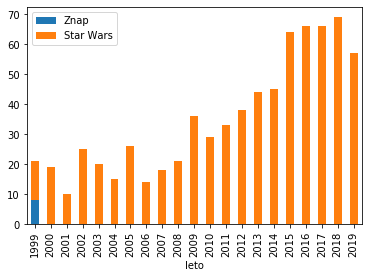

In [75]:
merg = pd.concat([df_z, df_sw], axis=1)
merg.plot.bar(stacked=True)

Izbranih top 12 tem-kategorij lego setov

In [101]:
most_pop = ['Star Wars', 'Duplo', 'Collectable Minifigures', 'City', 'Creator', 'Bionicle', 'Friends', 'Ninjago', 'Books', 'Technic', 'Racers', 'Education']
df_pop_tem = [pd.DataFrame(sets[sets['tema'] == tema].groupby('leto').size()).rename(columns={0: tema}) for tema in most_pop]
letne_teme = pd.concat(df_pop_tem, axis=1)


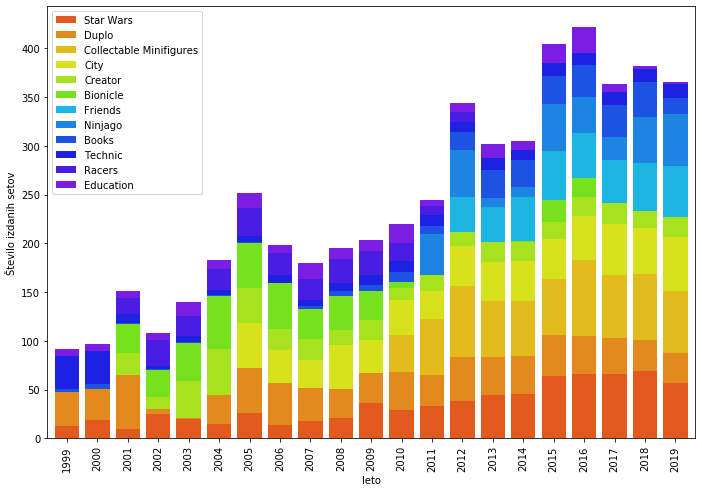

In [131]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111, position=[0, 0, 1.5, 1.5])
ax1.set_ylabel('Število izdanih setov')
colors = ['#E2591D', '#E28A1D', '#E2BC1D', '#D7E21D', '#A6E21D', '#75E21D', '#1DB5E2', '#1D84E2', '#1D53E2', '#1D21E2', '#4A1DE2', '#7B1DE2']
letne_teme.plot(kind='bar', ax=ax1, stacked=True, width=0.8, color=colors)
